#### Transforming  UNSTRUCTURED TO STRUCTURED data

In [1]:
import pandas as pd

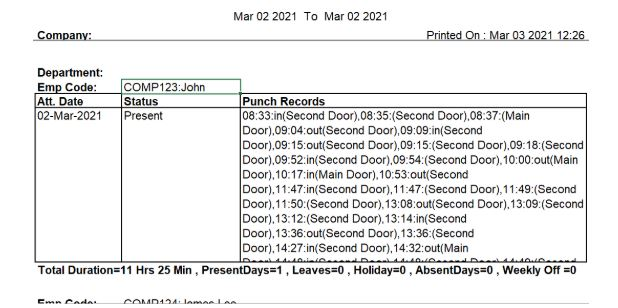

In [8]:
from IPython.display import Image, display
# Displaying the image to be processed:
display(Image(filename='C:/Users/Mirela Giantaru/OneDrive/Desktop/Unstructured_data_.jpg'))

In [9]:
# load data - an excel file that contains cells with info about the employee records; we want to create a structured file, 
# where all the fields have names and contain one type of data only
data = (r"C:\Users\Mirela Giantaru\OneDrive\Desktop\CV and interview\notebooks portfolio Python\bio.xlsx")
df = pd.read_excel(data)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,Daily Punch In Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Mar 02 2021 To Mar 02 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Company:,ABC Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Printed On : Mar 03 2021 12:26
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# removing NA values from the dataframe df
df = df.fillna("")

In [5]:
# removing all the blank rows
df1 = df.dropna(how='all')

In [6]:
# picking the rows where present or absent values are there from 14 no column
df1 = df1[df1['Unnamed: 14'].str.contains('sent')]

In [31]:
# Extracting only the Employee Names
df_name = df.dropna(how='all')

In [32]:
df_name.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,,Daily Punch In Report,,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,,,,
2,,Mar 02 2021 To Mar 02 2021,,,,,,,,,,,,,,,,,
3,,Company:,ABC Company,,,,,,,,,,,,,,Printed On : Mar 03 2021 12:26,,
4,,,,,,,,,,,,,,,,,,,


In [33]:
# from column no 3 we are picking Employee names
df_name = df_name[df_name['Unnamed: 3'].str.contains('Employee')]

In [34]:
# creating a new dataframe for Status, Punch Records and Employee Codes
zippedList = list(
	zip(df1['Unnamed: 14'], df1['Unnamed: 15'], df_name['Unnamed: 7']))

abc = pd.DataFrame(zippedList)
abc.head()

,0,1,2
0,Present,"08:33:in(Second Door),08:35:(Second Door),08:3...",COMP123:John Sherrif
1,Absent,,COMP124:James Lee
2,Present,"09:02:in(Second Door),09:06:(Main Door),09:59:...",COMP125:Wayne McDonald


##### Extracting Data for Second Door only, in the column 1

In [35]:
# Splitting the values by comma in field 2, or the column with punch records
for i in range(len(abc)):
	abc[1][i] = abc[1][i].split(",")

second_door = []

for i in range(len(abc)):
	s_d = []
	
	# Extracting all the values that contain  the string  ':in(Second Door)' or ':out(Second Door)'
	for j in range(len(abc[1][i])):
		if ':in(Second Door)' in abc[1][i][j]:
			s_d.append(abc[1][i][j])

		if 'out(Second Door)' in abc[1][i][j]:
			s_d.append(abc[1][i][j])

	second_door.append(s_d)
(second_door[0])


['08:33:in(Second Door)',
 '09:04:out(Second Door)',
 '09:09:in(Second Door)',
 '09:15:out(Second Door)',
 '09:52:in(Second Door)',
 '10:53:out(Second Door)',
 '11:47:in(Second Door)',
 '13:08:out(Second Door)',
 '13:14:in(Second Door)',
 '13:36:out(Second Door)',
 '14:27:in(Second Door)',
 '14:48:in(Second Door)',
 '14:56:out(Second Door)',
 '15:04:in(Second Door)',
 '16:22:out(Second Door)',
 '16:34:in(Second Door)']

##### The punch record should start with ‘IN’ and end with ‘OUT’. If that doesn't match, we create another pattern

In [36]:
# Punch Records should start with the keyword 'in'. If it doesn't match then we wil add also the string 'in' and it, meaning that the employee forgot to do the punch in
in_time = []
for i in range(len(second_door)):
	try:
		if ':in(Second Door)' not in second_door[i][0]:
			second_door[i].insert(0, 'in')

	except:
		pass
	
# Similarly, Punch Records should end with the string 'out'. If any record misses that, 'out' needs to be added,  and it means that the employee forgot to do 'punch out'
out_time = []
for i in range(len(second_door)):
	try:

		if ':out(Second Door)' not in second_door[i][(len(second_door[i]))-1]:
			second_door[i].insert(((len(second_door[i]))), 'out')
	except:
		pass
second_door[0]



['08:33:in(Second Door)',
 '09:04:out(Second Door)',
 '09:09:in(Second Door)',
 '09:15:out(Second Door)',
 '09:52:in(Second Door)',
 '10:53:out(Second Door)',
 '11:47:in(Second Door)',
 '13:08:out(Second Door)',
 '13:14:in(Second Door)',
 '13:36:out(Second Door)',
 '14:27:in(Second Door)',
 '14:48:in(Second Door)',
 '14:56:out(Second Door)',
 '15:04:in(Second Door)',
 '16:22:out(Second Door)',
 '16:34:in(Second Door)',
 'out']

#####  Creating the pattern ‘IN – OUT – IN – …..- OUT’. If someone forgot to do Punch – IN then we will put ‘IN’ & if someone forgot to do Punch – OUT then we will put ‘OUT’.

In [37]:
# final_in contains PUNCH - IN records for all employees
final_in = []

# final_out contains PUNCH - OUT records for all employees
final_out = []

for k in range(len(second_door)):
	in_gate = []
	out_gate = []
	
	# even positions should be for Punch-IN and odd positions should be for Punch - OUT. If this is not enough, we need to include those records too, so then we will 
	#create the pattern by putting 'in' or 'out' as a condition:
	for i in range(len(second_door[k])):
		if i % 2 == 0 and 'in' in second_door[k][i]:
			in_gate.append(second_door[k][i])
			try:
				if 'out' not in second_door[k][i+1]:
					out_gate.append('out')
			except:
				pass
		if i % 2 != 0 and 'out' in second_door[k][i]:
			out_gate.append(second_door[k][i])
			try:
				if 'in' not in second_door[k][i+1]:
					in_gate.append('in')
			except:
				pass
		if i % 2 != 0 and 'in' in second_door[k][i]:
			in_gate.append(second_door[k][i])

			try:
				if 'out' not in second_door[k][i+1]:
					out_gate.append('out')
			except:
				pass

		if i % 2 == 0 and 'out' in second_door[k][i]:
			out_gate.append(second_door[k][i])

			try:
				if 'in' not in second_door[k][i+1]:
					in_gate.append('in')
			except:
				pass
	final_in.append(in_gate)
	final_out.append(out_gate)

# final_in or final_out keep the records as a list (list form), so we will merge the lists

# aa contains merged list of Punch - IN
aa = final_in[0]
for i in range(len(final_in)-1):
	aa = aa + final_in[i+1]
	
# bb contains merged list of Punch - OUT
bb = final_out[0]
for i in range(len(final_out)-1):
	bb = bb + final_out[i+1]

for i in range(len(final_in[0])):
	print(final_in[0][i], ' ', final_out[0][i])

08:33:in(Second Door)   09:04:out(Second Door)
09:09:in(Second Door)   09:15:out(Second Door)
09:52:in(Second Door)   10:53:out(Second Door)
11:47:in(Second Door)   13:08:out(Second Door)
13:14:in(Second Door)   13:36:out(Second Door)
14:27:in(Second Door)   out
14:48:in(Second Door)   14:56:out(Second Door)
15:04:in(Second Door)   16:22:out(Second Door)
16:34:in(Second Door)   out


#### Creating the final table

In [38]:
# Creating a dataframe called df_final
df_final = []
df_final = pd.DataFrame(df_final)

In [39]:
# Merging the Employee Names
Name = []
for i in range(len(abc)):
	for j in range(len(final_in[i])):
		Name.append(abc[2][i])
df_final['Name'] = Name

In [40]:
# Zipping the Employee Name, Punch -IN
# records and Punch - OUT records
zippedList2 = list(zip(df_final['Name'], aa, bb))
abc2 = pd.DataFrame(zippedList2)

In [41]:

# Renaming the dataframe
abc2.columns = ['Emp Code', 'Punch - IN', 'Punch - OUT']
abc2.to_excel('output.xlsx', index=False)

In [42]:
# Print the final, structured table
display(abc2)


,Emp Code,Punch - IN,Punch - OUT
0,COMP123:John Sherrif,08:33:in(Second Door),09:04:out(Second Door)
1,COMP123:John Sherrif,09:09:in(Second Door),09:15:out(Second Door)
2,COMP123:John Sherrif,09:52:in(Second Door),10:53:out(Second Door)
3,COMP123:John Sherrif,11:47:in(Second Door),13:08:out(Second Door)
4,COMP123:John Sherrif,13:14:in(Second Door),13:36:out(Second Door)
5,COMP123:John Sherrif,14:27:in(Second Door),out
6,COMP123:John Sherrif,14:48:in(Second Door),14:56:out(Second Door)
7,COMP123:John Sherrif,15:04:in(Second Door),16:22:out(Second Door)
8,COMP123:John Sherrif,16:34:in(Second Door),out
9,COMP125:Wayne McDonald,09:02:in(Second Door),09:59:out(Second Door)


##### Hence, the raw biometric data has been structured and is converted to useful information.

###### SOURCE: https://www.geeksforgeeks.org/how-to-convert-unstructured-data-to-structured-data-using-python/